In [97]:
from utils import train
import os
import glob
from utils.models import model as mod
import json
from utils.datasets.speech_dataset_lstm import LSTMDataSet
import pandas as pd
import torch.utils.data as data
# import utils.models as mod
# mod = mod.model


In [3]:
# TODO add further training
names = [
    'gru_2l_conv_20',
    'gru_2l_conv_d1',
    'gru_2l_conv_d2_20',
    'gru_2l_conv_d3',
    'gru_dropout_0_2',
    'gru_dropout_0_3',
    'gru_2l_conv_d2_0_2',
    'gru_2l_conv_d2_0_3',
    'gru_2l_conv_d2_0_4',
    'gru_2l_conv_d2_0_5',
    'gru_dropout_asymm_01',
    'gru_dropout_asymm_02',
    'gru_dropout_asymm_03',
]

In [4]:
config = json.loads('{"no_cuda": true, "n_epochs": 1200, "lr": [0.0005], "schedule": [Infinity], "batch_size": 64, "dev_every": 1, "seed": 0, "use_nesterov": false, "input_file": "./model/gru_2l_conv_d2_0_2_2019-05-14T06:50:41.315932_0.94.pt", "output_file": "/Users/matyasfodor/sandbox/honk/utils/../model/model.pt", "gpu_no": 1, "cache_size": 32768, "momentum": 0.9, "weight_decay": 1e-05, "model": "lstm", "optimizer": "ADAM", "reduction": "", "drop_value": 0.0, "desired_len": 50, "scale_down": 1.0, "use_lstm_loader": false, "group_speakers_by_id": true, "silence_prob": 0.1, "noise_prob": 0.8, "n_dct_filters": 40, "input_length": 16000, "n_mels": 40, "timeshift_ms": 100, "unknown_prob": 0.1, "train_pct": 80, "dev_pct": 10, "test_pct": 10, "wanted_words": ["yes", "no", "up", "down", "left", "right", "on", "off", "stop", "go"], "data_folder": "/Users/matyasfodor/susu/Thesis/baseline/speech_commands_v0.02", "audio_preprocess_type": "normalized_logmel", "n_labels": 12, "width": 40, "num_layers": 2, "hidden_size": 40, "kind": "GRU", "conv": true, "dropout": [0.2, 0.2], "type": "eval", "output_prefix": "debug_ibuvda", "data_set": "speech", "ds_downsample": null}')

In [25]:
def get_model(name):
    glob_path = os.path.join('./model', f'{name}*')
    hits = glob.glob(glob_path)
    return hits[0]

In [77]:
def get_config(input_file, overrides=None):
    if overrides is None:
        overrides = {}
    ret = config.copy()
    ret['input_file'] = input_file
    for k, v in overrides.items():
        ret[k] = v
    return ret

In [7]:
def load_model(config):
    model = mod.find_model(config['model'])(config)
    model.load(config["input_file"])

In [9]:
for name in names:
    print(get_model(name))

./model/gru_2l_conv_2019-05-11T05:59:39.829407_0.92.pt
./model/gru_2l_conv_d1_2019-05-13T06:57:54.458942_0.93.pt
./model/gru_2l_conv_d2_2019-05-13T06:06:51.002159_0.93.pt
./model/gru_2l_conv_d3_2019-05-13T07:54:13.916058_0.92.pt
./model/gru_dropout_0_2_2019-05-14T06:09:20.842709_0.94.pt
./model/gru_dropout_0_3_2019-05-14T06:35:38.138240_0.94.pt
./model/gru_2l_conv_d2_0_2_2019-05-14T06:50:41.315932_0.94.pt
./model/gru_2l_conv_d2_0_3_2019-05-14T06:33:26.098789_0.94.pt
./model/gru_2l_conv_d2_0_4_2019-05-14T06:45:51.688917_0.90.pt
./model/gru_2l_conv_d2_0_5_2019-05-14T06:57:57.781614_0.92.pt
./model/gru_dropout_asymm_01_2019-05-15T10:18:25.102224_0.93.pt
./model/gru_dropout_asymm_02_2019-05-15T11:48:36.999433_0.70.pt
./model/gru_dropout_asymm_03_2019-05-15T10:51:40.396554_0.94.pt


In [10]:
train_ds, val_ds, test_ds = LSTMDataSet.splits(config)

{'yes': 2, 'no': 3, 'up': 4, 'down': 5, 'left': 6, 'right': 7, 'on': 8, 'off': 9, 'stop': 10, 'go': 11, '__silence__': 0, '__unknown__': 1}


In [12]:
dss = [train_ds, val_ds, test_ds]
dss = [data.DataLoader(
            ds,
            batch_size=len(ds),
            collate_fn=ds.collate_fn) for ds in dss]

In [13]:
results = []
for name in names:
    print(name)
    model_path = get_model(name)
    config = get_config(model_path)
    model = load_model(config)
    res = []
    for ds in dss:
        res.append(train.evaluate(config, model, ds))
    results.append([name] + res)
    

gru_2l_conv_20


  0%|          | 0/1 [00:00<?, ?it/s]

### Reduction: from 1628833 to 1628833 - 0.00


  0%|          | 0/1 [00:00<?, ?it/s]

### Reduction: from 191688 to 191688 - 0.00


  0%|          | 0/1 [00:00<?, ?it/s]

### Reduction: from 218176 to 218176 - 0.00


100%|██████████| 1/1 [00:15<00:00, 15.85s/it]


gru_2l_conv_d1


  0%|          | 0/1 [00:00<?, ?it/s]

### Reduction: from 1628833 to 1628833 - 0.00


  0%|          | 0/1 [00:00<?, ?it/s]

### Reduction: from 191688 to 191688 - 0.00


  0%|          | 0/1 [00:00<?, ?it/s]

### Reduction: from 218176 to 218176 - 0.00


100%|██████████| 1/1 [00:09<00:00,  9.21s/it]


gru_2l_conv_d2_20


  0%|          | 0/1 [00:00<?, ?it/s]

### Reduction: from 1628833 to 1628833 - 0.00


  0%|          | 0/1 [00:00<?, ?it/s]

### Reduction: from 191688 to 191688 - 0.00


  0%|          | 0/1 [00:00<?, ?it/s]

### Reduction: from 218176 to 218176 - 0.00


100%|██████████| 1/1 [00:10<00:00, 10.59s/it]


gru_2l_conv_d3


  0%|          | 0/1 [00:00<?, ?it/s]

### Reduction: from 1628833 to 1628833 - 0.00


  0%|          | 0/1 [00:00<?, ?it/s]

### Reduction: from 191688 to 191688 - 0.00


  0%|          | 0/1 [00:00<?, ?it/s]

### Reduction: from 218176 to 218176 - 0.00


100%|██████████| 1/1 [00:13<00:00, 13.59s/it]


gru_dropout_0_2


  0%|          | 0/1 [00:00<?, ?it/s]

### Reduction: from 1628833 to 1628833 - 0.00


  0%|          | 0/1 [00:00<?, ?it/s]

### Reduction: from 191688 to 191688 - 0.00


  0%|          | 0/1 [00:00<?, ?it/s]

### Reduction: from 218176 to 218176 - 0.00


100%|██████████| 1/1 [00:11<00:00, 11.01s/it]


gru_dropout_0_3


  0%|          | 0/1 [00:00<?, ?it/s]

### Reduction: from 1628833 to 1628833 - 0.00


  0%|          | 0/1 [00:00<?, ?it/s]

### Reduction: from 191688 to 191688 - 0.00


  0%|          | 0/1 [00:00<?, ?it/s]

### Reduction: from 218176 to 218176 - 0.00


100%|██████████| 1/1 [00:07<00:00,  7.92s/it]


gru_2l_conv_d2_0_2


  0%|          | 0/1 [00:00<?, ?it/s]

### Reduction: from 1628833 to 1628833 - 0.00


  0%|          | 0/1 [00:00<?, ?it/s]

### Reduction: from 191688 to 191688 - 0.00


  0%|          | 0/1 [00:00<?, ?it/s]

### Reduction: from 218176 to 218176 - 0.00


100%|██████████| 1/1 [00:09<00:00,  9.26s/it]


gru_2l_conv_d2_0_3


  0%|          | 0/1 [00:00<?, ?it/s]

### Reduction: from 1628833 to 1628833 - 0.00


  0%|          | 0/1 [00:00<?, ?it/s]

### Reduction: from 191688 to 191688 - 0.00


  0%|          | 0/1 [00:00<?, ?it/s]

### Reduction: from 218176 to 218176 - 0.00


100%|██████████| 1/1 [00:09<00:00,  9.51s/it]


gru_2l_conv_d2_0_4


  0%|          | 0/1 [00:00<?, ?it/s]

### Reduction: from 1628833 to 1628833 - 0.00


  0%|          | 0/1 [00:00<?, ?it/s]

### Reduction: from 191688 to 191688 - 0.00


  0%|          | 0/1 [00:00<?, ?it/s]

### Reduction: from 218176 to 218176 - 0.00


100%|██████████| 1/1 [00:07<00:00,  7.50s/it]


gru_2l_conv_d2_0_5


  0%|          | 0/1 [00:00<?, ?it/s]

### Reduction: from 1628833 to 1628833 - 0.00


  0%|          | 0/1 [00:00<?, ?it/s]

### Reduction: from 191688 to 191688 - 0.00


  0%|          | 0/1 [00:00<?, ?it/s]

### Reduction: from 218176 to 218176 - 0.00


100%|██████████| 1/1 [00:09<00:00,  9.16s/it]


gru_dropout_asymm_01


  0%|          | 0/1 [00:00<?, ?it/s]

### Reduction: from 1628833 to 1628833 - 0.00


  0%|          | 0/1 [00:00<?, ?it/s]

### Reduction: from 191688 to 191688 - 0.00


  0%|          | 0/1 [00:00<?, ?it/s]

### Reduction: from 218176 to 218176 - 0.00


100%|██████████| 1/1 [00:08<00:00,  8.24s/it]


gru_dropout_asymm_02


  0%|          | 0/1 [00:00<?, ?it/s]

### Reduction: from 1628833 to 1628833 - 0.00


  0%|          | 0/1 [00:00<?, ?it/s]

### Reduction: from 191688 to 191688 - 0.00


  0%|          | 0/1 [00:00<?, ?it/s]

### Reduction: from 218176 to 218176 - 0.00


100%|██████████| 1/1 [00:07<00:00,  7.71s/it]


gru_dropout_asymm_03


  0%|          | 0/1 [00:00<?, ?it/s]

### Reduction: from 1628833 to 1628833 - 0.00


  0%|          | 0/1 [00:00<?, ?it/s]

### Reduction: from 191688 to 191688 - 0.00


  0%|          | 0/1 [00:00<?, ?it/s]

### Reduction: from 218176 to 218176 - 0.00


100%|██████████| 1/1 [00:17<00:00, 17.39s/it]


In [26]:
# def dummy():
#     model_path = get_model('gru_dropout_asymm_02')
#     config = get_config(model_path)
#     model = load_model(config)
#     res = []
#     for ds in dss:
#         res.append(train.evaluate(config, model, ds))
#     return res
# results.append(['gru_dropout_asymm_02'] + dummy())

  0%|          | 0/1 [00:00<?, ?it/s]

### Reduction: from 1628833 to 1628833 - 0.00


  0%|          | 0/1 [00:00<?, ?it/s]

### Reduction: from 191688 to 191688 - 0.00


  0%|          | 0/1 [00:00<?, ?it/s]

### Reduction: from 218176 to 218176 - 0.00


100%|██████████| 1/1 [00:08<00:00,  8.34s/it]


In [32]:
df = pd.DataFrame(results)

In [33]:
df.columns = ['Name', 'TrainAcc', 'ValAcc', 'TestAcc']

In [34]:
df['$D_{conv}\(P\)$'] = pd.Series([0.0, 0.1, 0.1, 0.0, 0.2, 0.3, 0.2, 0.3, 0.4, 0.5, 0.2, 0.25, 0.3])
df['$D_{rnn}\(P\)$']  = pd.Series([0.0, 0.0, 0.1, 0.1, 0.0, 0.0, 0.2, 0.3, 0.4, 0.5, 0.3, 0.25, 0.3])

In [35]:
list(df.columns)

['Name',
 'TrainAcc',
 'ValAcc',
 'TestAcc',
 '$D_{conv}\\(P\\)$',
 '$D_{rnn}\\(P\\)$']

In [36]:
reord = df[['Name', '$D_{conv}\\(P\\)$', '$D_{rnn}\\(P\\)$', 'TrainAcc', 'ValAcc', 'TestAcc']]

In [37]:
reord['TrainAcc - ValAcc'] = reord['TrainAcc'] - reord['ValAcc']

/Users/matyasfodor/.pyenv/versions/baseline/lib/python3.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [38]:
reord

Name  $D_{conv}\(P\)$  $D_{rnn}\(P\)$  TrainAcc    ValAcc   TestAcc  TrainAcc - ValAcc
0         gru_2l_conv_20             0.00            0.00  0.945992  0.910250  0.901272           0.035741
1         gru_2l_conv_d1             0.10            0.00  0.953176  0.918672  0.921750           0.034504
2      gru_2l_conv_d2_20             0.10            0.10  0.944847  0.921078  0.913775           0.023769
3         gru_2l_conv_d3             0.00            0.10  0.944732  0.914341  0.904936           0.030392
4        gru_dropout_0_2             0.20            0.00  0.949083  0.928296  0.922613           0.020786
5        gru_dropout_0_3             0.30            0.00  0.942586  0.930943  0.927139           0.011642
6     gru_2l_conv_d2_0_2             0.20            0.20  0.943788  0.926612  0.923690           0.017176
7     gru_2l_conv_d2_0_3             0.30            0.30  0.937892  0.928537  0.929726           0.009355
8     gru_2l_conv_d2_0_4             0.40            0.40  0.900054  0.889557  0.886829           0.010497
9     gru_2l_conv_d2_0_5             0.50            0.50  0.920376  0.910972  0.913990           0.009403
10  gru_dropout_asymm_01             0.20            0.30  0.935774  0.923003  0.918948           0.012771
11  gru_dropout_asymm_03             0.25            0.25  0.936117  0.925650  0.923475           0.010468
12  gru_dropout_asymm_02             0.30            0.30  0.942528  0.930221  0.928433           0.012307

In [44]:
print(reord.to_latex(formatters={
    'TrainAcc': '{:,.2%}'.format,
    'ValAcc': '{:,.2%}'.format,
    'TestAcc': '{:,.2%}'.format,
    'TrainAcc - ValAcc': '{:,.2%}'.format
}))

\begin{tabular}{llrrrrrr}
\toprule
{} &                  Name &  \$D\_\{conv\}\textbackslash (P\textbackslash )\$ &  \$D\_\{rnn\}\textbackslash (P\textbackslash )\$ & TrainAcc & ValAcc & TestAcc & TrainAcc - ValAcc \\
\midrule
0  &        gru\_2l\_conv\_20 &             0.00 &            0.00 &   94.60\% & 91.03\% &  90.13\% &             3.57\% \\
1  &        gru\_2l\_conv\_d1 &             0.10 &            0.00 &   95.32\% & 91.87\% &  92.18\% &             3.45\% \\
2  &     gru\_2l\_conv\_d2\_20 &             0.10 &            0.10 &   94.48\% & 92.11\% &  91.38\% &             2.38\% \\
3  &        gru\_2l\_conv\_d3 &             0.00 &            0.10 &   94.47\% & 91.43\% &  90.49\% &             3.04\% \\
4  &       gru\_dropout\_0\_2 &             0.20 &            0.00 &   94.91\% & 92.83\% &  92.26\% &             2.08\% \\
5  &       gru\_dropout\_0\_3 &             0.30 &            0.00 &   94.26\% & 93.09\% &  92.71\% &             1.16\% \\
6  &    gru\_2l\_conv\_d2\_0

In [51]:
save_df = df

In [45]:
with open('allmodels.txt') as fp:
    allmodels = [l.strip() for l in fp.readlines()]

In [46]:
len(allmodels)

11542

In [48]:
len(res_gru)

1022

In [54]:
res_gru['name'] = res_gru['filename'].str.slice(0, len('res-gru-1') + 1)

In [56]:
res_gru['stracc'] = res_gru['filename'].str.slice(-7, -3)

In [59]:
res_gru['acc'] = pd.to_numeric(res_gru['stracc'])

In [61]:
res_gru_maxes = res_gru.loc[res_gru.groupby(["name"])["acc"].idxmax()] 

In [62]:
res_gru_maxes

filename        name stracc   acc
103   res-gru-11_2019-06-10T09:47:10.838902_0.85.pt  res-gru-11   0.85  0.85
238   res-gru-12_2019-06-10T15:10:53.342876_0.93.pt  res-gru-12   0.93  0.93
364   res-gru-13_2019-06-10T17:33:51.987312_0.92.pt  res-gru-13   0.92  0.92
456   res-gru-14_2019-06-10T06:36:36.466667_0.81.pt  res-gru-14   0.81  0.81
552   res-gru-15_2019-06-10T09:29:50.343886_0.91.pt  res-gru-15   0.91  0.91
630   res-gru-16_2019-06-10T11:57:45.467345_0.86.pt  res-gru-16   0.86  0.86
730   res-gru-17_2019-06-10T10:46:49.835632_0.86.pt  res-gru-17   0.86  0.86
884   res-gru-18_2019-06-10T10:33:07.491068_0.93.pt  res-gru-18   0.93  0.93
1015  res-gru-19_2019-06-10T07:30:46.895584_0.87.pt  res-gru-19   0.87  0.87

In [67]:
def get_res_stats(name):
    res_gru = pd.DataFrame([l for l in allmodels if l.startswith(name)])
    res_gru.columns = ['filename']
    res_gru['name'] = res_gru['filename'].str.slice(0, len(name) + 1)
    res_gru['stracc'] = res_gru['filename'].str.slice(-7, -3)
    res_gru['acc'] = pd.to_numeric(res_gru['stracc'])
    res_gru_maxes = res_gru.loc[res_gru.groupby(["name"])["acc"].idxmax()] 
    return res_gru_maxes

In [70]:
get_res_stats('res-gru-1')

filename        name stracc   acc
103   res-gru-11_2019-06-10T09:47:10.838902_0.85.pt  res-gru-11   0.85  0.85
238   res-gru-12_2019-06-10T15:10:53.342876_0.93.pt  res-gru-12   0.93  0.93
364   res-gru-13_2019-06-10T17:33:51.987312_0.92.pt  res-gru-13   0.92  0.92
456   res-gru-14_2019-06-10T06:36:36.466667_0.81.pt  res-gru-14   0.81  0.81
552   res-gru-15_2019-06-10T09:29:50.343886_0.91.pt  res-gru-15   0.91  0.91
630   res-gru-16_2019-06-10T11:57:45.467345_0.86.pt  res-gru-16   0.86  0.86
730   res-gru-17_2019-06-10T10:46:49.835632_0.86.pt  res-gru-17   0.86  0.86
884   res-gru-18_2019-06-10T10:33:07.491068_0.93.pt  res-gru-18   0.93  0.93
1015  res-gru-19_2019-06-10T07:30:46.895584_0.87.pt  res-gru-19   0.87  0.87

In [71]:
get_res_stats('res-gru-d1')

filename         name stracc   acc
125  res-gru-d11_2019-06-12T09:36:31.093293_0.86.pt  res-gru-d11   0.86  0.86
241  res-gru-d12_2019-06-12T05:41:04.965351_0.93.pt  res-gru-d12   0.93  0.93
336  res-gru-d13_2019-06-11T23:46:46.779646_0.84.pt  res-gru-d13   0.84  0.84
446  res-gru-d14_2019-06-12T16:12:20.807296_0.83.pt  res-gru-d14   0.83  0.83
518  res-gru-d15_2019-06-12T04:03:03.428328_0.91.pt  res-gru-d15   0.91  0.91
636  res-gru-d16_2019-06-12T09:17:51.368185_0.88.pt  res-gru-d16   0.88  0.88
750  res-gru-d17_2019-06-12T11:20:58.415962_0.86.pt  res-gru-d17   0.86  0.86
800  res-gru-d19_2019-06-11T19:50:44.619239_0.60.pt  res-gru-d19   0.60  0.60

In [72]:
get_res_stats('res-gru-2')

filename        name stracc   acc
110   res-gru-20_2019-06-20T12:44:48.864754_0.92.pt  res-gru-20   0.92  0.92
399   res-gru-21_2019-06-21T04:41:51.843344_0.93.pt  res-gru-21   0.93  0.93
556   res-gru-22_2019-06-21T08:26:03.919647_0.93.pt  res-gru-22   0.93  0.93
657   res-gru-23_2019-06-20T21:22:45.333059_0.85.pt  res-gru-23   0.85  0.85
870   res-gru-24_2019-06-21T08:42:07.670815_0.85.pt  res-gru-24   0.85  0.85
1224  res-gru-25_2019-06-21T14:14:11.074662_0.91.pt  res-gru-25   0.91  0.91
1361  res-gru-26_2019-06-21T11:07:28.737027_0.75.pt  res-gru-26   0.75  0.75

In [73]:
get_res_stats('res-lstm-')

filename        name stracc   acc
245   res-lstm-four_2019-06-05T11:46:22.429532_0.93.pt  res-lstm-f   0.93  0.93
384    res-lstm-six_2019-06-05T05:57:45.395386_0.93.pt  res-lstm-s   0.93  0.93
607  res-lstm-three_2019-06-05T12:38:15.524314_0.93.pt  res-lstm-t   0.93  0.93

In [74]:
len(dss)

3

In [78]:
def evaluate_names(names, overrides=None):
    results = []
    for name in names:
        print(name)
        model_path = get_model(name)
        config = get_config(model_path, overrides)
        model = load_model(config)
        res = []
        for ds in dss:
            res.append(train.evaluate(config, model, ds))
        results.append([name] + res)
    return pd.DataFrame(results)

In [102]:
res_lstm_results = evaluate_names(['res-lstm-four_'], {'conv': 'four'})

res-lstm-four_


UnboundLocalError: local variable 'sd' referenced before assignment

In [87]:
import importlib

In [101]:
mod = importlib.reload(mod)

In [94]:
mod

<module 'utils.models.model' from '/Users/matyasfodor/sandbox/honk/utils/models/model.py'>

In [106]:
print(reord.describe().to_latex())

\begin{tabular}{lrrrrrr}
\toprule
{} &  \$D\_\{conv\}\textbackslash (P\textbackslash )\$ &  \$D\_\{rnn\}\textbackslash (P\textbackslash )\$ &   TrainAcc &     ValAcc &    TestAcc &  TrainAcc - ValAcc \\
\midrule
count &        13.000000 &       13.000000 &  13.000000 &  13.000000 &  13.000000 &          13.000000 \\
mean  &         0.219231 &        0.188462 &   0.938226 &   0.919856 &   0.916660 &           0.018370 \\
std   &         0.146541 &        0.168515 &   0.013972 &   0.011506 &   0.012454 &           0.009757 \\
min   &         0.000000 &        0.000000 &   0.900054 &   0.889557 &   0.886829 &           0.009355 \\
25\%   &         0.100000 &        0.000000 &   0.936117 &   0.914341 &   0.913775 &           0.010497 \\
50\%   &         0.200000 &        0.200000 &   0.942586 &   0.923003 &   0.921750 &           0.012771 \\
75\%   &         0.300000 &        0.300000 &   0.944847 &   0.928296 &   0.923690 &           0.023769 \\
max   &         0.500000 &        0.500000 

In [108]:
nets = [
    ['gru_2l_conv', 92.97, 922],
    ['gru-conv-2', 92.55,  850],
    ['gru-conv-3', 93.11,  434],
    ['gru-conv-4', 93.41,  748],
    ['gru-conv-5', 91.9,   914],
    ['gru-conv-6', 92.85,  928],
    
    ['gru-wide-1', 85.47,  1100],
    ['gru-wide-2', 92.63,  646],
    ['gru-wide-3', 91.61,  1200],
    
    ['gru-deep-1', 91.10,  2900],
    ['gru-deep-2', 86.14,  1400],
    ['gru-deep-3', 85.95,  1600],
]

In [111]:
names, accuracies, madds = list(zip(*nets))

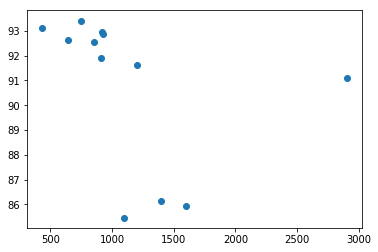

In [114]:
import matplotlib.pyplot as plt
%matplotlib inline


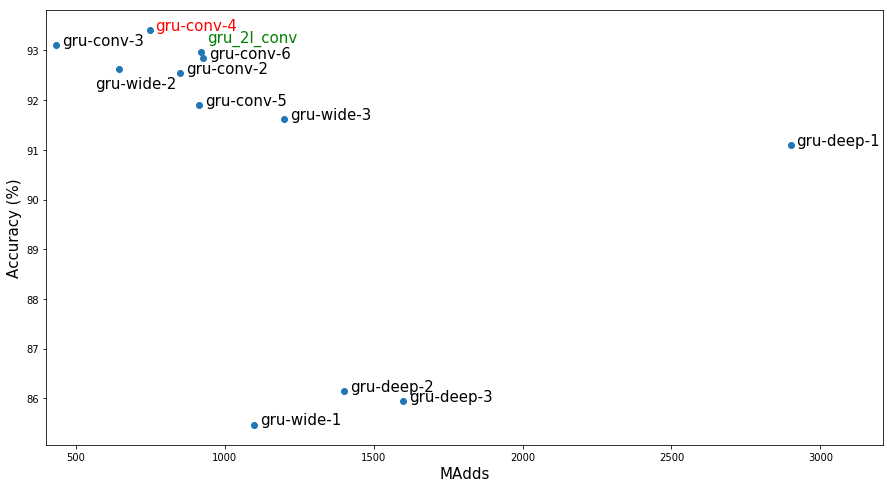

In [150]:
fig=plt.figure(figsize=(15, 8))
ax = plt.scatter(madds, accuracies)
for i in range(len(names)):
    ycoord = accuracies[i]
    xcoord = madds[i] + 20
    color = 'black'
    if names[i] == 'gru_2l_conv':
        ycoord += .2
        color = 'green'
    if names[i] == 'gru-conv-4':
        color = 'red'
    if names[i] == 'gru-wide-2':
        xcoord -= 100
        ycoord -= .4
    plt.text(xcoord, ycoord, names[i], fontsize=15, color=color)
#     plt.annotate(names[i], (madds[i] + 20, accuracies[i]))
plt.xlim(400,3210)
plt.ylabel('Accuracy (%)', fontsize=15)
plt.xlabel('MAdds', fontsize=15)
plt.savefig('Results-scatter.eps')

In [151]:
%%bash
open .